In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import textwrap
%matplotlib inline

In [2]:
df = pd.read_csv("../rol-scores.csv")

In [24]:
def histogram(variable, 
              bins="auto",
              density = False,
              title="", 
              numticks=5, 
              labelsize=15, 
              size=(10, 10)):
    var = np.sort(np.array(variable))
    
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    
    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname='Lato')
    
    ax.locator_params(nbins=numticks)
    ax.tick_params(axis=u'both', 
                   which=u'both', 
                   length=0, 
                   labelsize = labelsize, 
                   pad=labelsize * 0.66,
                   labelcolor = (0.25, 0.25, 0.25))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    ax.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))
    
    ax.hist(var, bins=bins, density=density)
    bars = [x for x in ax.get_children() if type(x) is matplotlib.patches.Rectangle]
    for idx, bar in enumerate(bars):
        if idx % 2 == 0:
            bar.set_color((0.1, 0.1, 0.1, 0.3))
        else:
            bar.set_color((0.4, 0.4, 0.4, 0.3))
    bars[-1].set_color("white")
    return fig

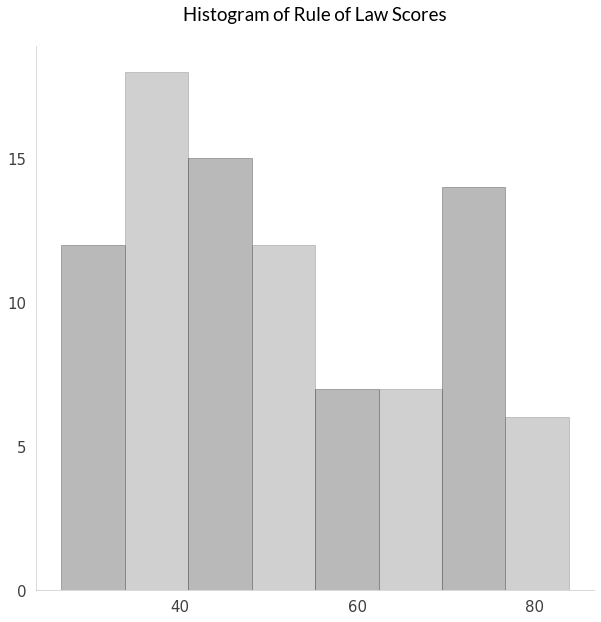

In [25]:
foo = histogram(df["RoLScore"], title="Histogram of Rule of Law Scores")